In [152]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import sqlite3

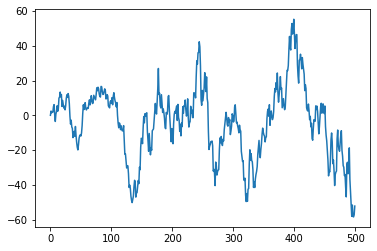

In [153]:
# Nere we should make the dataset. 
from numpy import random 

seq_length = 500

t = []
t.append(random.random())
Imean = 0
Ivar = 3

Apoint = 1 * seq_length//4

Amean = 0
Avar = 6


for i in range(seq_length-1):
    if i < Apoint:
        t.append(t[i] + random.normal(Imean, Ivar))
    else:
        t.append(t[i] + random.normal(Amean, Avar))

plt.plot(t)
plt.show()


          0
0  0.104837
1  2.537727
2  1.525140
3  2.132721
4  1.905170
            0
0         NaN
1  538.536189
2    0.159212
3    0.158705
4    0.011384
                  0
count  4.990000e+02
mean   1.756649e+03
std    3.910866e+04
min    2.355296e-08
25%    1.455033e-02
50%    9.723579e-02
75%    4.645336e-01
max    8.736267e+05


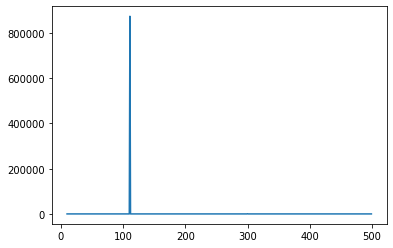

In [154]:
pdt = pd.DataFrame(t)
print(pdt.head())
variance = pd.DataFrame(t).pct_change()**2
print(variance.head())
print(variance.describe()   )
plt.plot(variance[10:])
plt.show()

In [155]:
# We will now generate the input and output data.

datapoints = 100
seq_length = 300
window_size = 20

output_label_tuples = []

Imean = 0
Ivar = 3

Apoint = 3 * seq_length//4
Amean = 1
Avar = 6

for _ in range(datapoints):
    t = [random.normal(Imean, Ivar), random.normal(Imean, Ivar)]
    for i in range(seq_length-2):
        if i < Apoint:
            t.append(t[i] + random.normal(Imean, Ivar))
        else:
            t.append(t[i] + random.normal(Amean, Avar) + t[i-1])

    pdt = pd.DataFrame(t)
    variance_series = pd.DataFrame(t).pct_change()**2
    
    input_data = []
    labels_data = []

    for p in range(window_size+1, seq_length):
        input_data.append(np.array([variance_series.iloc[p-window_size:p].values]))
        labels_data.append(variance_series.iloc[p])

    output_label_tuples.append((torch.tensor(input_data, dtype=torch.float32).squeeze(), torch.tensor(labels_data, dtype=torch.float32)))

In [156]:
print(output_label_tuples[0][0])

tensor([[9.3846e-01, 1.1661e+04, 3.0712e+00,  ..., 2.6698e-01, 5.6813e+00,
         4.9512e-01],
        [1.1661e+04, 3.0712e+00, 6.4448e+00,  ..., 5.6813e+00, 4.9512e-01,
         8.0551e+00],
        [3.0712e+00, 6.4448e+00, 2.1990e+00,  ..., 4.9512e-01, 8.0551e+00,
         1.1341e+00],
        ...,
        [1.0541e-01, 1.0547e-01, 1.0537e-01,  ..., 1.0544e-01, 1.0544e-01,
         1.0544e-01],
        [1.0547e-01, 1.0537e-01, 1.0548e-01,  ..., 1.0544e-01, 1.0544e-01,
         1.0544e-01],
        [1.0537e-01, 1.0548e-01, 1.0541e-01,  ..., 1.0544e-01, 1.0544e-01,
         1.0544e-01]])


In [157]:
train_Output = output_label_tuples[:int(0.8*datapoints)]
test_Output = output_label_tuples[int(0.8*datapoints):]

In [158]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, masterarray):
        self.masterarray = masterarray
    
    def __len__(self):
        return len(self.masterarray)
    
    def __getitem__(self, idx):
        return self.masterarray[idx]

In [159]:
train_dataset = CustomDataset(train_Output)
test_dataset = CustomDataset(test_Output)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

In [173]:
inner_size = 128

class Model(nn.Module):
    def __init__(self, channels):
        super(Model, self).__init__()
        self.chanel = channels

        self.linear1 = nn.Linear(window_size, inner_size)
        self.linear = nn.ModuleList()

        for i in range(channels):
            self.linear.append(nn.Linear(inner_size, inner_size))
            self.linear.append(nn.ReLU())

        
        self.linear_final = nn.Linear(inner_size, 1)
  
    
    def forward(self, x):
        print(x.shape)
        return x[:, :, 19]

In [174]:
model= Model(5)
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.01)

torch.Size([1, 179, 20])
Epoch: 0, Loss:  182.5505828857422
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 

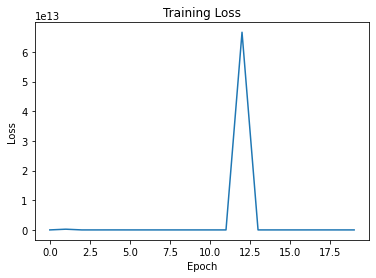

In [177]:
num_epochs = 20
loss_values = []

for epoch in range(num_epochs):
    for i, (price_data, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(price_data)
        
        outputs = outputs.squeeze()
        labels = labels.squeeze()

        loss = criterion(outputs, labels)
        #loss.backward()
        #optimizer.step()
    
        # Print the loss
        if i % 100 == 0:
            print(f'Epoch: {epoch}, Loss:  {loss.item()}')
            loss_values.append(loss.item())
  
# Plot the loss values
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

Would It not just be better to take the previous value as the thing -> this woudl make more sense but the whole of this technique is that it that should on any model. This is a good test for your models which you have been making as this is a sense where it is impossible to get any on the model.

torch.Size([1, 179, 20])


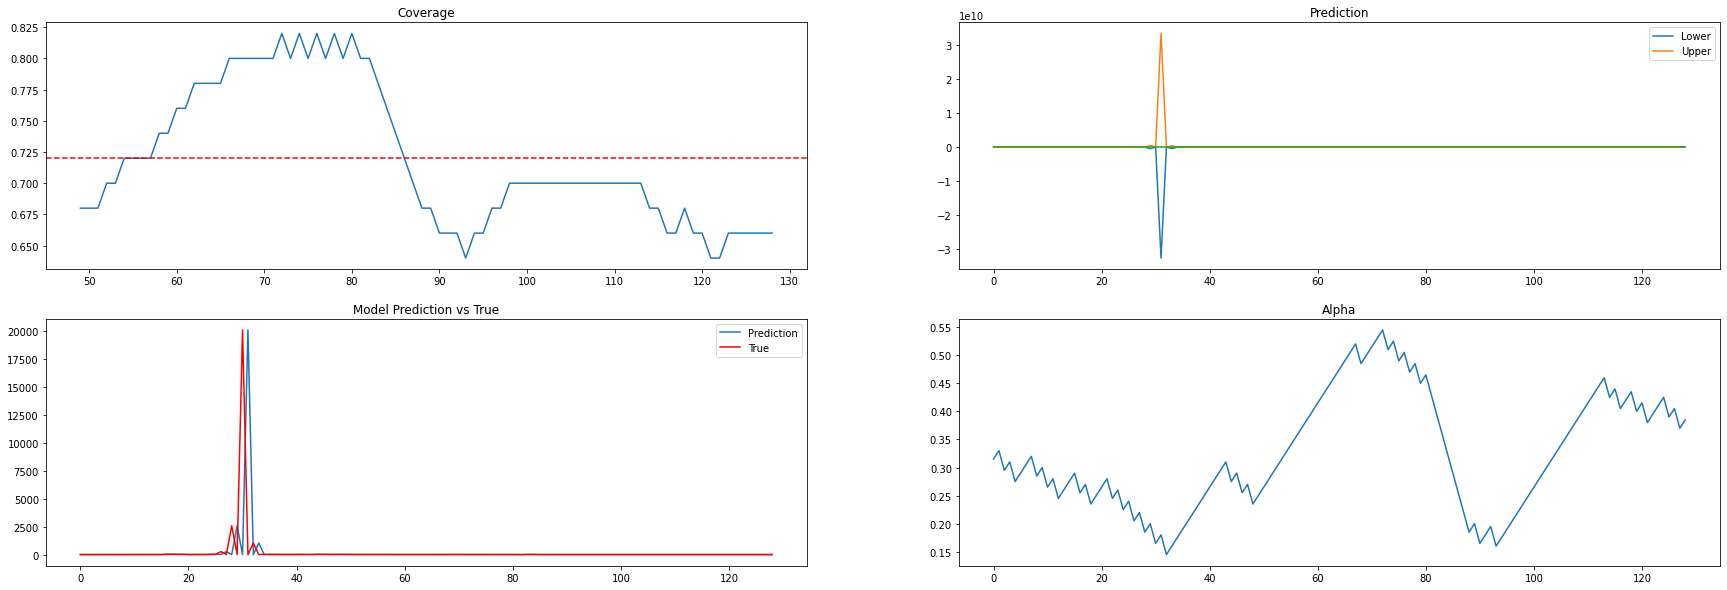

torch.Size([1, 179, 20])


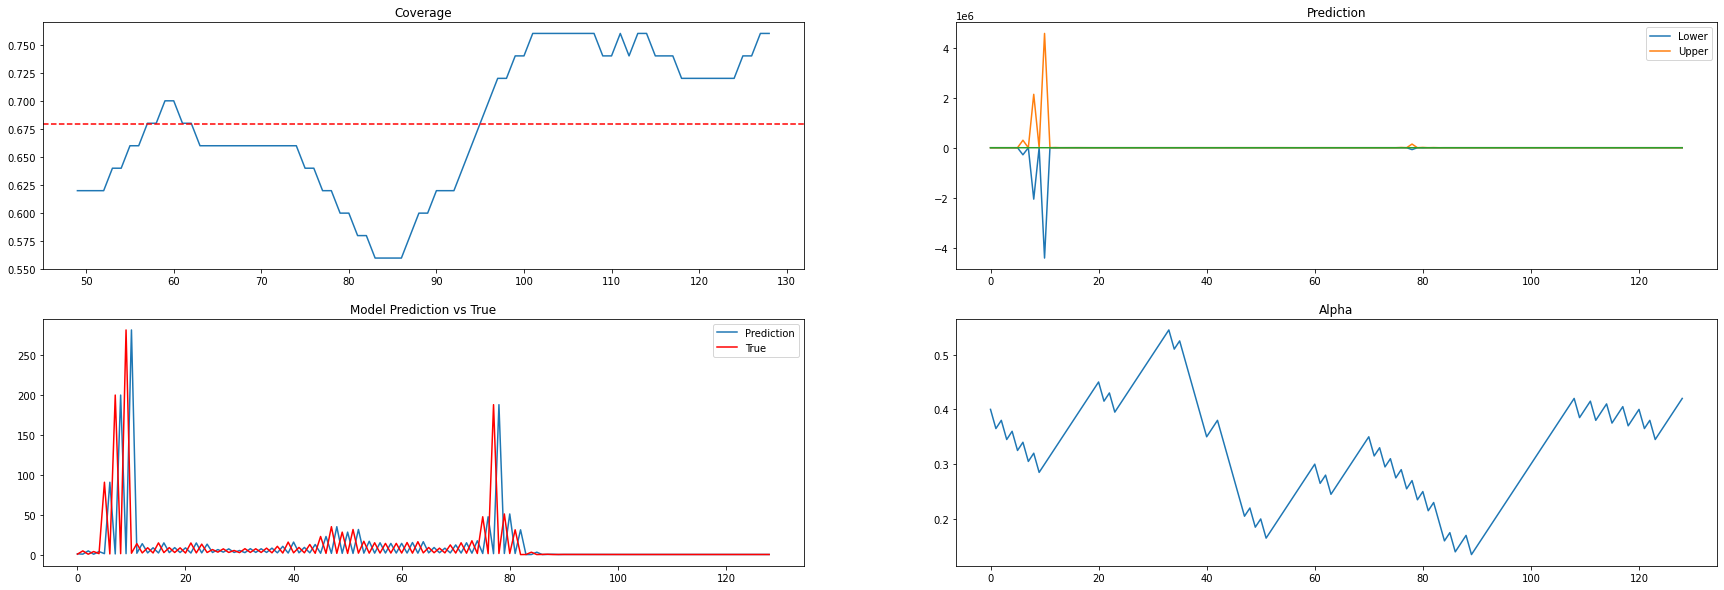

torch.Size([1, 179, 20])


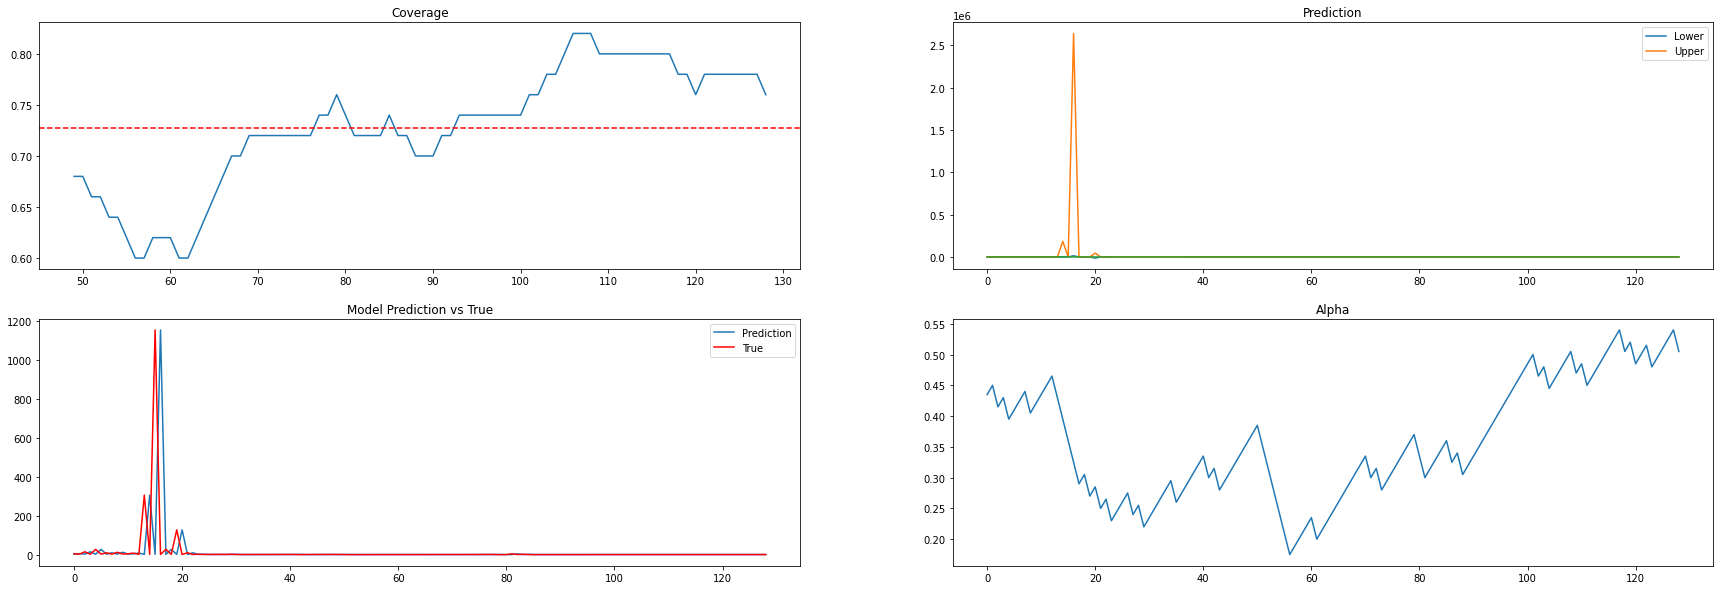

torch.Size([1, 179, 20])


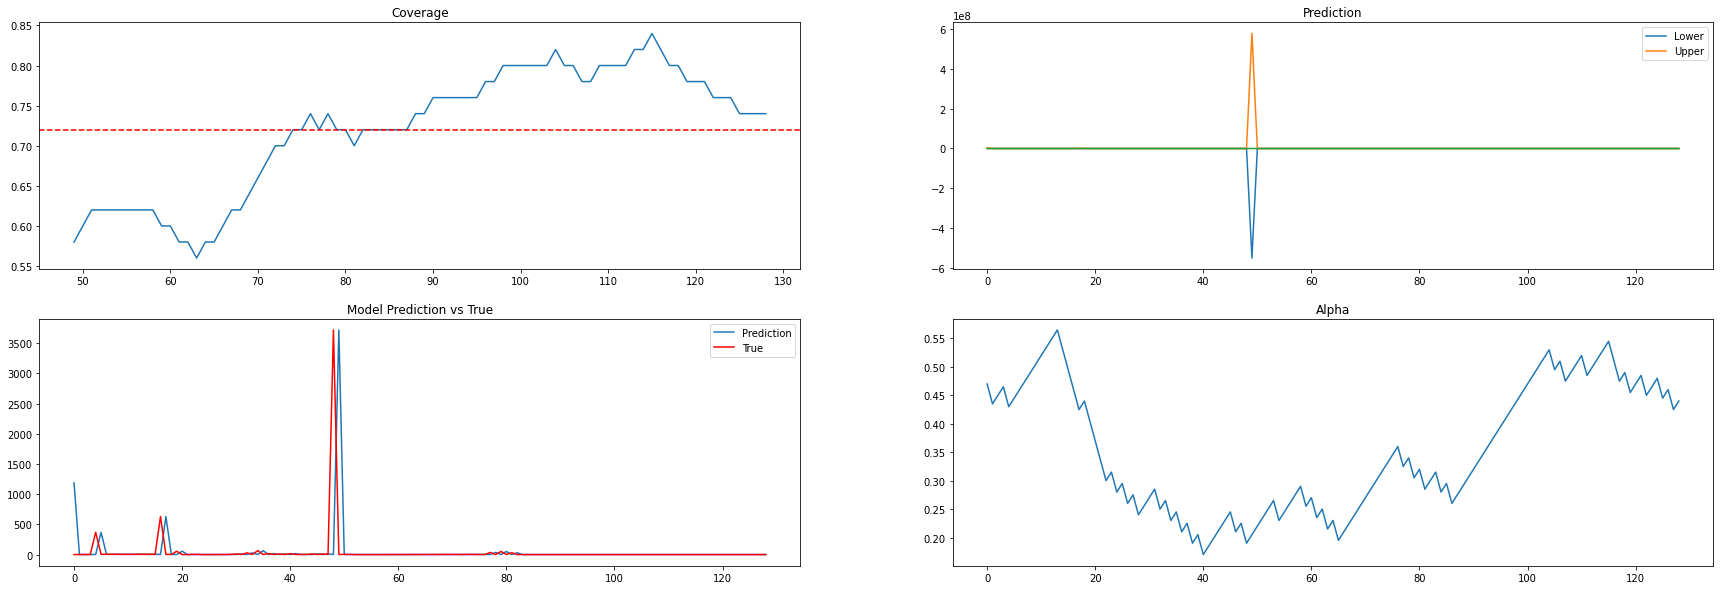

torch.Size([1, 179, 20])


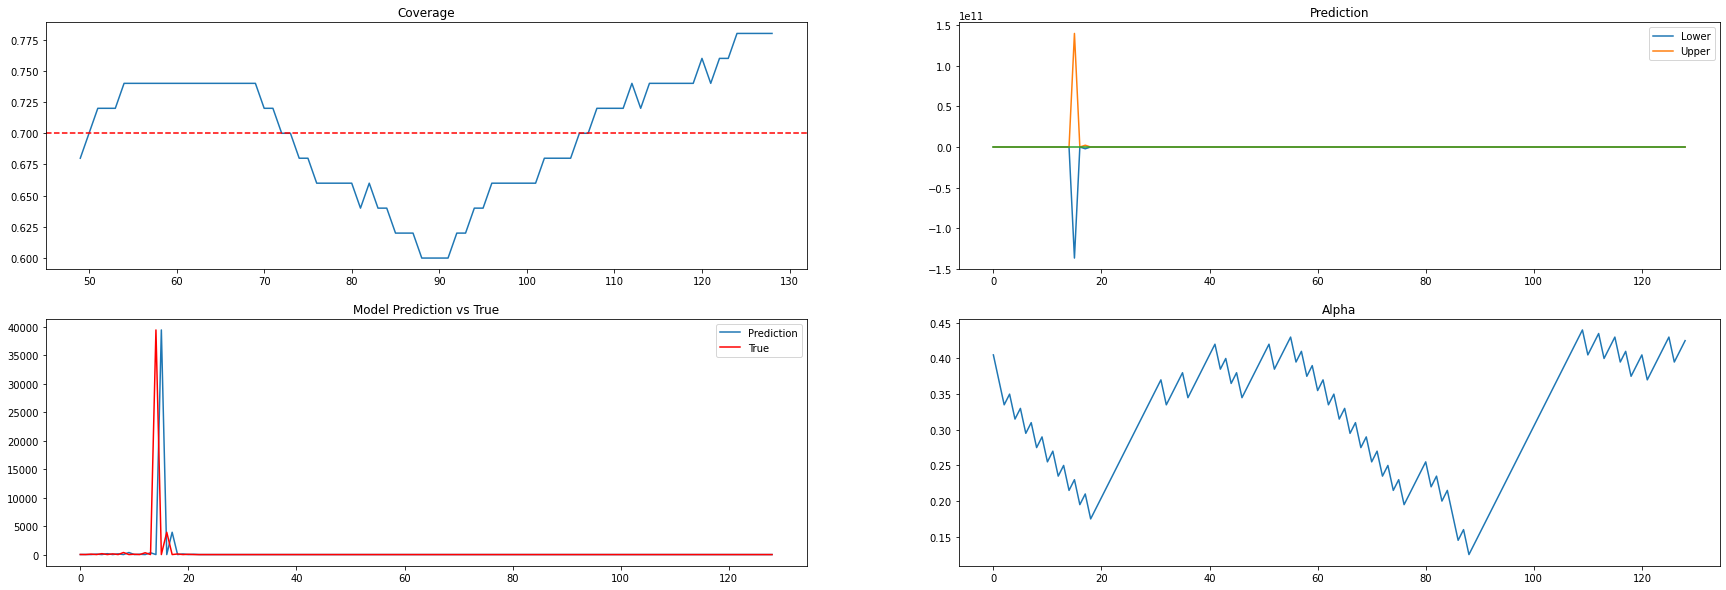

torch.Size([1, 179, 20])


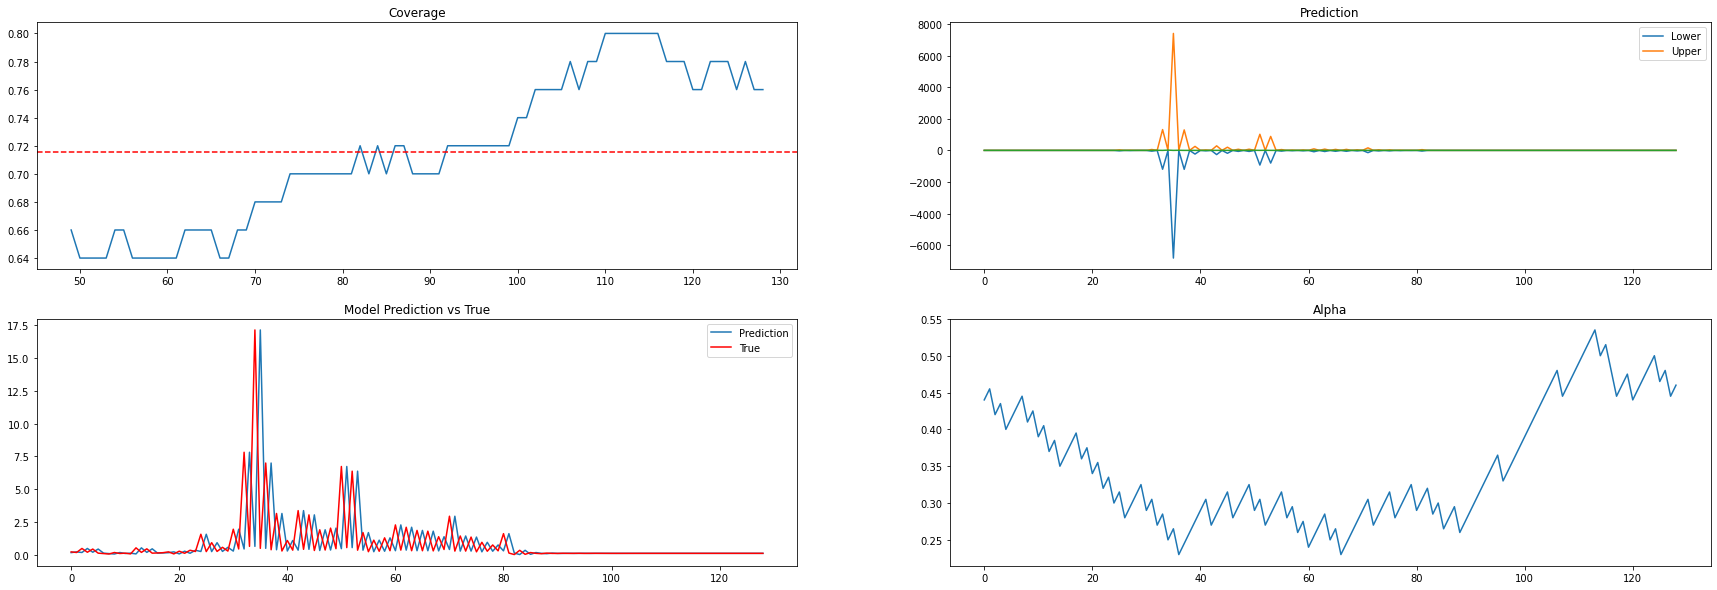

torch.Size([1, 179, 20])


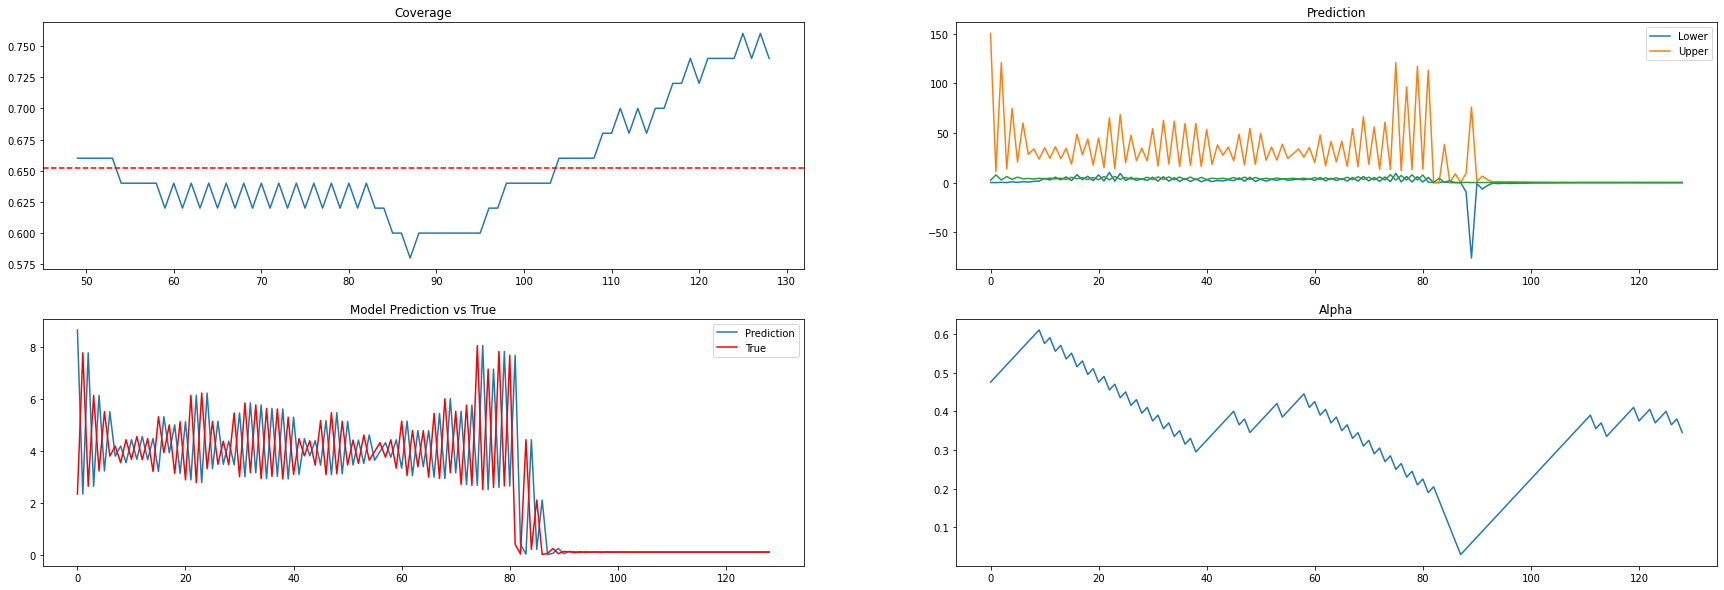

torch.Size([1, 179, 20])


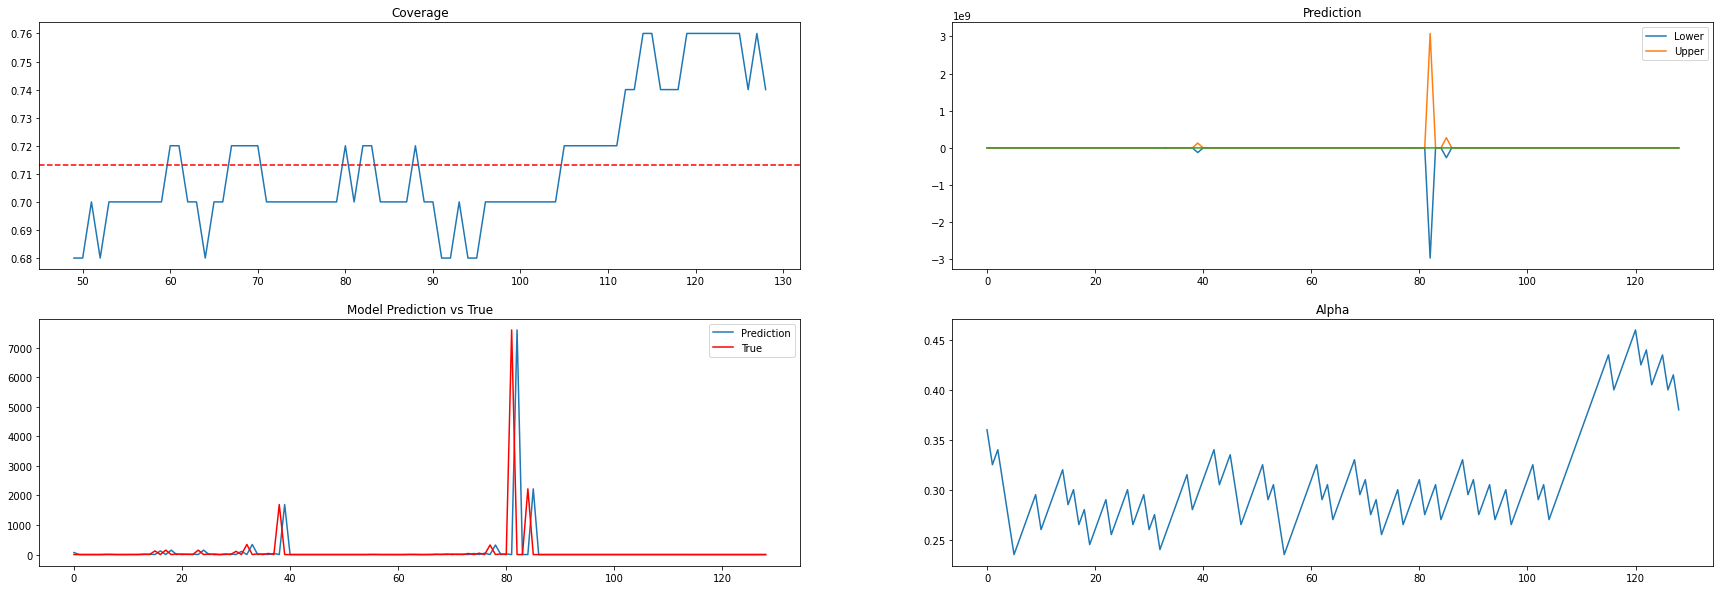

torch.Size([1, 179, 20])


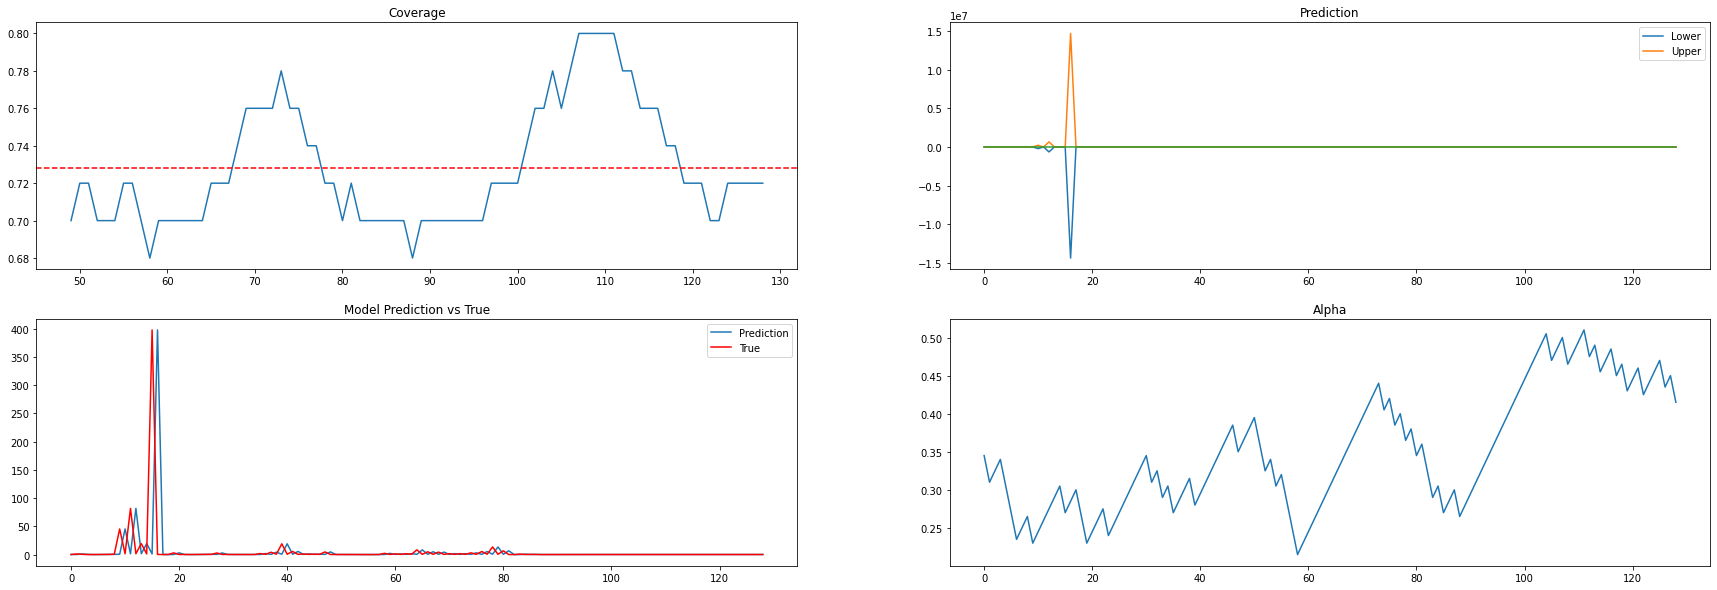

torch.Size([1, 179, 20])


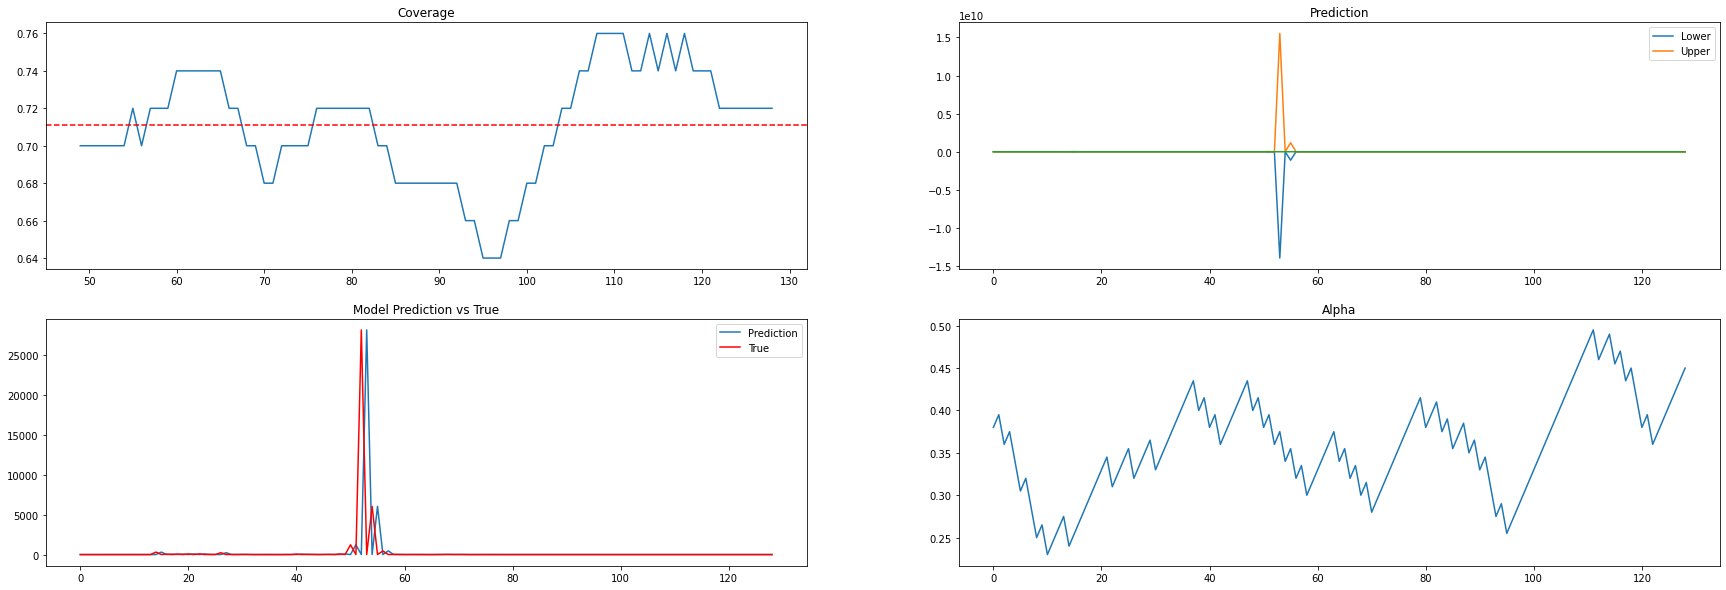

torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
torch.Size([1, 179, 20])
The average coverage is 0.70785
The average distance between the upper and lower predictions is 105272789.96181194


In [183]:
from scipy.optimize import minimize


# This function returns the quantile
def Q_t(p, scores):
    return np.quantile(scores, p)

# This function predicts a range of Y_t at the alpha level. By using alpha_t.
def C_t(alpha_t, scores, sigma_t, t, roll_size=1250):
    positve_v = (sigma_t**2) + (sigma_t**2 * Q_t(1-alpha_t, scores[t-roll_size:t]))
    negative_v = (sigma_t**2) - (sigma_t**2 * Q_t(1-alpha_t, scores[t-roll_size:t]))
    return negative_v, positve_v

# This function returns 1 if the prediction lies in the interval, 0 otherwise.
def err_t(Y_t, C_t):
    if C_t[0] < Y_t < C_t[1]:
        return 0
    else:
        return 1
    

# We have 240 elememts we want a decent approximation of the quantile. So we will start at.
inital_window_size = 50
alpha = 0.3
orignal_alpha = alpha 
gamma = 0.05

with torch.no_grad():
    total_coverage_list = []
    for m, (x, y) in enumerate(test_loader):
        # Getting the prediction and the actual value.
        xpred = model(x).squeeze().detach().numpy()
        y = y.squeeze().detach().numpy()
        
        # Calculating the scores at each time step
        All_scores = (abs(y - xpred**2))/(xpred**2)

        error_list = []
        Coverage_list = []
        alpha_list = []
        
        for i in range(inital_window_size, len(All_scores)):
            # This is not inclusive of i, Q_t is used already in the other function
            #Quantile_t = Q_t(alpha, All_scores[:i])

            # This is inclusive of i
            Coverage_t = C_t(alpha, All_scores, xpred[i], i, 200)
            Coverage_list.append(Coverage_t)
            error_t = err_t(y[i], Coverage_t)
            error_list.append(error_t)

            alpha = min(max(alpha + (gamma * (orignal_alpha - error_t)), 0), 1)
            alpha_list.append(alpha)

        
        coverage = 1 - pd.Series(error_list).rolling(50).mean().mean()
        total_coverage_list.append(coverage)

        
        if m<10:
            fig, axs = plt.subplots(2, 2, figsize=(30, 10))
            
            axs[0][0].plot(1 - pd.Series(error_list).rolling(50).mean())
            axs[0][0].axhline(coverage, color='r', linestyle='--')
            axs[0][0].set_title('Coverage')
            
            axs[0][1].plot([ele[0] for ele in Coverage_list], label='Lower')
            axs[0][1].plot([ele[1] for ele in Coverage_list], label='Upper')
            axs[0][1].plot(y[inital_window_size:])
            axs[0][1].set_title('Prediction')
            axs[0][1].legend()

            axs[1][0].plot(xpred[inital_window_size:], label='Prediction')
            axs[1][0].plot(y[inital_window_size:], label='True', color='r')
            axs[1][0].legend()
            axs[1][0].set_title('Model Prediction vs True')

            axs[1][1].plot(alpha_list)
            axs[1][1].set_title('Alpha')


            plt.show()



print('The average coverage is', np.mean(total_coverage_list))

# Would be useful to know the average distance between the upper and lower predictions.
average_distance = np.mean([ele[1] - ele[0] for ele in Coverage_list])
print('The average distance between the upper and lower predictions is', average_distance)